In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import pandas as pd


In [79]:
# Частина перша -> Hw2.1.ipynb
# Прочитайте дані за допомогою методу read_html з таблиці
# 'Коефіцієнт народжуваності в регіонах України (1950—2019)'
# ! таблиця за посиланням містить дані 1950-2014, 2014-2019 вишукувати самому, чи знехтувати за браком часу?
#  Якщо таблиці правильно оформлені, то метод дозволяє достатньо ефективно виконувати необхідну роботу.
# part 1 table 1 -> p1t1
p1t1 = pd.read_html(
    io='https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C_%D0%B2_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D1%96',
    match='Коефіцієнт народжуваності у регіонах',
)


In [3]:
# Вивести перші рядки таблиці за допомогою методу head
# значення абсолютні на 1000 осіб, а відображені на сторінці відсотки
print(p1t1[0].head())


                      регіон   1950   1960   1970  1990  1992  1994  1996  \
0  Автономна Республіка Крим  230.0  206.0  160.0   130   109    93    80   
1          Вінницька область  224.0  192.0  142.0   124   119   107   103   
2          Волинська область  247.0  250.0  179.0   153   150   137   125   
3   Дніпропетровська область  204.0  204.0  151.0   123   106    92    80   
4           Донецька область  271.0  214.0  140.0   109    94    82    70   

   2000  2004  2008  2012   2014  
0    73    90   119   126    NaN  
1    84    90   108   112  109.0  
2   112   119   148   148  141.0  
3    71    89   110   112  111.0  
4    61    76    98    98   82.0  


In [4]:
# Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
print(p1t1[0].shape)


(28, 13)


In [5]:
# Замініть у таблиці значення '—' на значення NaN
# ? автоматично NaN стало, де були порожні комірки
print(p1t1[0].replace(
    to_replace=np.nan,
    value='-',
    # Whether to modify the DataFrame rather than creating a new one.
    inplace=False,
    limit=None,  # Maximum size gap to forward or backward fill
    regex=False,  #
    # method=_NoDefault.no_default
)
)
print(p1t1[0].replace(
    to_replace='-',
    value=np.nan,
)
)


                       регіон   1950   1960   1970  1990  1992  1994  1996  \
0   Автономна Республіка Крим  230.0  206.0  160.0   130   109    93    80   
1           Вінницька область  224.0  192.0  142.0   124   119   107   103   
2           Волинська область  247.0  250.0  179.0   153   150   137   125   
3    Дніпропетровська область  204.0  204.0  151.0   123   106    92    80   
4            Донецька область  271.0  214.0  140.0   109    94    82    70   
5         Житомирська область  261.0  223.0  159.0   129   128   118   108   
6        Закарпатська область  314.0  273.0  207.0   168   161   138   128   
7          Запорізька область  219.0  197.0  150.0   124   107    92    81   
8   Івано-Франківська область  243.0  248.0  182.0   155   144   131   122   
9            Київська область  204.0  189.0  156.0   123   111    99    92   
10     Кіровоградська область  216.0  171.0  145.0   126   119   107    96   
11          Луганська область  262.0  235.0  144.0   116   101  

In [6]:
# Визначте типи всіх стовпців за допомогою dataframe.dtypes
# float64 й int64 бо зчитувалось абсолютне значення, а відображались % ?
print(p1t1[0].dtypes)


регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
1992        int64
1994        int64
1996        int64
2000        int64
2004        int64
2008        int64
2012        int64
2014      float64
dtype: object


In [7]:
# Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ '—'
# ? Так замінили ж символ '—' на NaN. Комірок? Цілих колонок де всі значення NaN наче ж немає...
p1t1m1 = p1t1[0].fillna(0, inplace=False)
print(p1t1m1)


                       регіон   1950   1960   1970  1990  1992  1994  1996  \
0   Автономна Республіка Крим  230.0  206.0  160.0   130   109    93    80   
1           Вінницька область  224.0  192.0  142.0   124   119   107   103   
2           Волинська область  247.0  250.0  179.0   153   150   137   125   
3    Дніпропетровська область  204.0  204.0  151.0   123   106    92    80   
4            Донецька область  271.0  214.0  140.0   109    94    82    70   
5         Житомирська область  261.0  223.0  159.0   129   128   118   108   
6        Закарпатська область  314.0  273.0  207.0   168   161   138   128   
7          Запорізька область  219.0  197.0  150.0   124   107    92    81   
8   Івано-Франківська область  243.0  248.0  182.0   155   144   131   122   
9            Київська область  204.0  189.0  156.0   123   111    99    92   
10     Кіровоградська область  216.0  171.0  145.0   126   119   107    96   
11          Луганська область  262.0  235.0  144.0   116   101  

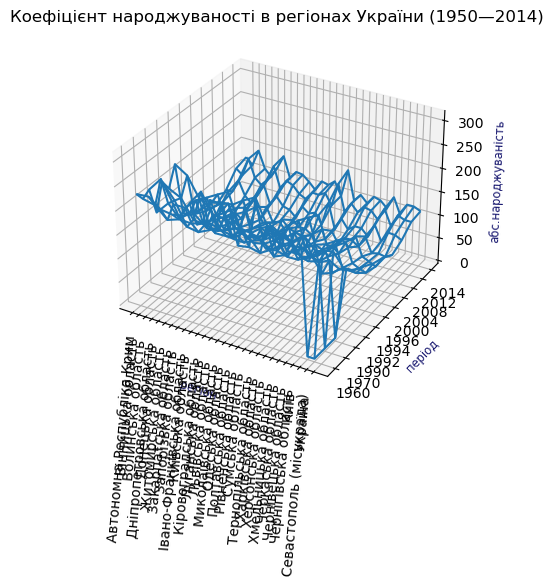

In [83]:

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

xl = np.array(p1t1m1['регіон'])
yl = np.array(p1t1m1.columns)[1:]
plt.xticks(ticks=np.arange(0, xl.shape[0]), labels=xl, rotation=85)
plt.yticks(ticks=np.arange(0, yl.shape[0]), labels=yl)
plt.xlabel('регіон', fontsize='small', color='midnightblue')
plt.ylabel('період', fontsize='small', color='midnightblue')
ax.set_zlabel('абс.народжуваність', fontsize='small', color='midnightblue')
plt.title('Коефіцієнт народжуваності в регіонах України (1950—2014)', fontsize=12)

x, y = np.meshgrid(
    np.arange(0, xl.shape[0]), np.arange(1, yl.shape[0]))

ax.plot_wireframe(
                  x,
                  y,
                  p1t1m1.to_numpy()[x, y],
                  )

plt.show()


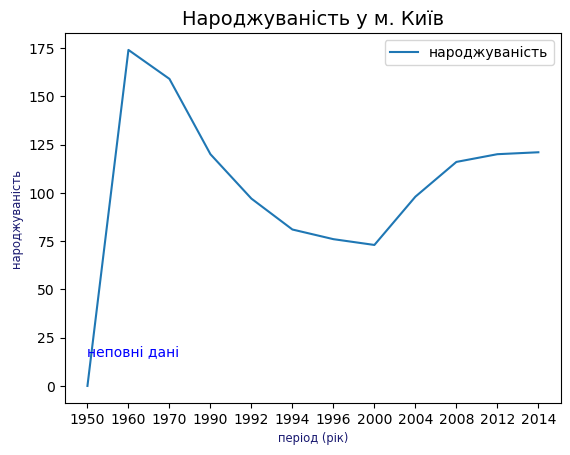

In [118]:
period = np.array(p1t1m1.columns)[1:]
plt.plot(period, np.array(
    np.array(p1t1m1[p1t1m1['регіон'] == 'Київ'].iloc[0][1:])), label='народжуваність')

plt.xlabel('період (рік)', fontsize='small', color='midnightblue')
plt.ylabel('народжуваність', fontsize='small', color='midnightblue')
plt.title('Народжуваність у м. Київ', fontsize=14)
plt.text(period[0], 15, 'неповні дані', color="blue")
plt.legend()

plt.show()


In [124]:
p1t1m1[p1t1m1['регіон'] == 'Україна']
[0 for _ in p1t1m1[p1t1m1['регіон'] == 'Україна']]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

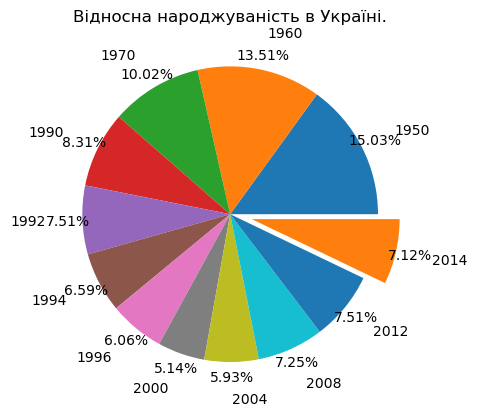

In [129]:
labels = np.array(p1t1m1.columns)[1:]

data = np.array(p1t1m1[p1t1m1['регіон'] == 'Україна'].iloc[0][1:])
explode = [0 for _ in p1t1m1[p1t1m1['регіон'] == 'Україна']][:-2] + [0.15]
plt.pie(
    data,
    labels=labels,
    shadow=False,
    explode=explode,
    autopct="%.2f%%",
    pctdistance=1.10,
    labeldistance=1.25,
)

plt.title('Відносна народжуваність в Україні.', fontsize=12)
plt.show()


In [8]:
# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
map_p1t1 = p1t1[0].isna()  # alias .isnull()
print(map_p1t1)
print(np.sum(map_p1t1, axis=0))


    регіон   1950   1960   1970   1990   1992   1994   1996   2000   2004  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
5    False  False  False  False  False  False  False  False  False  False   
6    False  False  False  False  False  False  False  False  False  False   
7    False  False  False  False  False  False  False  False  False  False   
8    False  False  False  False  False  False  False  False  False  False   
9    False  False  False  False  False  False  False  False  False  False   
10   False  False  False  False  False  False  False  False  False  False   
11   False  False  False  False  False  False  False  False  False  False   

In [9]:
# Видаліть з таблиці дані по всій країні, останній рядок таблиці
print(new_p1t1 := p1t1[0].drop(p1t1[0].shape[0]-1))


                       регіон   1950   1960   1970  1990  1992  1994  1996  \
0   Автономна Республіка Крим  230.0  206.0  160.0   130   109    93    80   
1           Вінницька область  224.0  192.0  142.0   124   119   107   103   
2           Волинська область  247.0  250.0  179.0   153   150   137   125   
3    Дніпропетровська область  204.0  204.0  151.0   123   106    92    80   
4            Донецька область  271.0  214.0  140.0   109    94    82    70   
5         Житомирська область  261.0  223.0  159.0   129   128   118   108   
6        Закарпатська область  314.0  273.0  207.0   168   161   138   128   
7          Запорізька область  219.0  197.0  150.0   124   107    92    81   
8   Івано-Франківська область  243.0  248.0  182.0   155   144   131   122   
9            Київська область  204.0  189.0  156.0   123   111    99    92   
10     Кіровоградська область  216.0  171.0  145.0   126   119   107    96   
11          Луганська область  262.0  235.0  144.0   116   101  

In [10]:
# Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
new_p1t1 = new_p1t1.fillna({key: new_p1t1[key].mean() for key in new_p1t1.columns[1:]})
print(new_p1t1)

                       регіон    1950        1960   1970  1990  1992  1994  \
0   Автономна Республіка Крим  230.00  206.000000  160.0   130   109    93   
1           Вінницька область  224.00  192.000000  142.0   124   119   107   
2           Волинська область  247.00  250.000000  179.0   153   150   137   
3    Дніпропетровська область  204.00  204.000000  151.0   123   106    92   
4            Донецька область  271.00  214.000000  140.0   109    94    82   
5         Житомирська область  261.00  223.000000  159.0   129   128   118   
6        Закарпатська область  314.00  273.000000  207.0   168   161   138   
7          Запорізька область  219.00  197.000000  150.0   124   107    92   
8   Івано-Франківська область  243.00  248.000000  182.0   155   144   131   
9            Київська область  204.00  189.000000  156.0   123   111    99   
10     Кіровоградська область  216.00  171.000000  145.0   126   119   107   
11          Луганська область  262.00  235.000000  144.0   116  

In [11]:
# Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
# в таблиці дані лише до 2014 включно...
print(new_p1t1[new_p1t1['2014'] > new_p1t1['2014'].mean()]['регіон'])


2             Волинська область
5           Житомирська область
6          Закарпатська область
8     Івано-Франківська область
9              Київська область
12            Львівська область
13         Миколаївська область
14              Одеська область
16           Рівненська область
20           Херсонська область
21          Хмельницька область
23          Чернівецька область
25                         Київ
Name: регіон, dtype: object


In [17]:
# У якому регіоні була найвища народжуваність у 2014 році?
print(new_p1t1[new_p1t1['2014'] == new_p1t1['2014'].max()]['регіон'].iloc[0])


Рівненська область


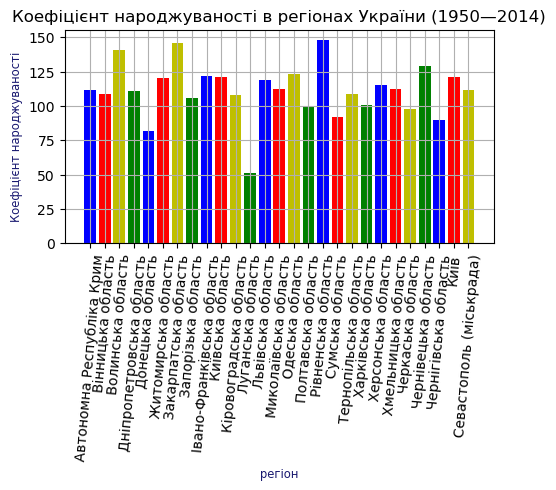

In [18]:
# Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
# в таблиці дані лише до 2014 включно...
colors = []
[colors.extend(['b', 'r', 'y', 'g'])
 for _ in range(len(new_p1t1['регіон']) // 4 + 1)]
plt.bar(
    new_p1t1['регіон'],
    new_p1t1['2014'],
    color=colors[:len(new_p1t1['регіон'])]
    # angle=-0.5
)

plt.xlabel('регіон', fontsize='small', color='midnightblue')
plt.ylabel('Коефіцієнт народжуваності', fontsize='small', color='midnightblue')
plt.title('Коефіцієнт народжуваності в регіонах України (1950—2014)', fontsize=12)
plt.xticks(rotation=85)
plt.grid(True)
plt.subplots_adjust(
    top=0.935,
    bottom=0.49,
    left=0.14,
    right=0.81,
    hspace=0.2,
    wspace=0.2
)
plt.show()
